<a href="https://colab.research.google.com/github/CARC2806/TI3002C.101/blob/main/A00833458_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: Playing with probability and distributions: Bionomial, Normal, t, chi-squared, and F.

## Libraries

In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

## **Binomial Distribution**

In this activity, you will take on the role of a Quality Control Manager at a large-scale electronics manufacturing facility. The factory produces 100,000 electronic devices per day, and based on historical data, it has been determined that 3% of the products are defective. To maintain high-quality standards, every hour a random sample of 50 devices is inspected for defects. Your task is to analyze the probability of defective products in these batches using the binomial distribution. This analysis will help you and your team understand the risk of receiving batches with an unacceptable number of defects and guide decision-making for quality control limits. The objective is to calculate probabilities, simulate different batch results, and analyze the findings to ensure the factory meets its stringent quality targets. You will model and simulate the number of defective products in random batches, compare different scenarios, and use Python to compute probabilities and visualize the distribution of defects. Using the binomial distribution, you will determine:

The likelihood of receiving a certain number of defective products in a batch of 50 devices.
The probability of receiving an acceptable or unacceptable number of defective products.
Recommendations to ensure the defect rate stays within acceptable limits.

In [7]:
batch = 50
defective_percentage = 0.03
ed = 2

probability_exactly_2 = stats.binom.pmf(ed, batch, defective_percentage)
print(f"Probability of finding exactly 2 defective devices: {probability_exactly_2:.4f}")

Probability of finding exactly 2 defective devices: 0.2555


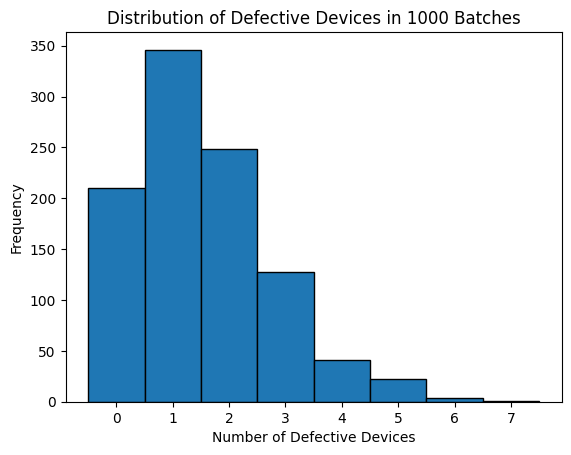

In [11]:
num_batches = 1000

simulation = np.random.binomial(batch, defective_percentage, num_batches)

# Plot the histogram
plt.hist(simulation, bins=range(0, max(simulation) + 2), edgecolor='black', align='left')
plt.xlabel('Number of Defective Devices')
plt.ylabel('Frequency')
plt.title('Distribution of Defective Devices in 1000 Batches')
plt.show()

In [12]:
probability_5_or_more = 1 - stats.binom.cdf(4, batch, defective_percentage)
print(f"Probability of finding 5 or more defective devices: {probability_5_or_more:.4f}")

Probability of finding 5 or more defective devices: 0.0168


#**Normal distribution**

You are the Head of the Examination Committee at a prestigious university. The university conducted a midterm exam for 1000 students, and the exam scores follow a normal distribution with a mean score of 75 and a standard deviation of 10. As part of the analysis, you want to investigate the performance of the students. The university has established that scores below 60 are considered failing, while scores above 90 are considered exceptional. Your task is to use the normal distribution to model the exam scores, calculate probabilities, and simulate results to understand the distribution of students' performance. This will help you determine how many students fall into different categories, from failing to exceptional.

In [18]:
mean = 75
std_dev = 10
score_fail = 60

probability_below_60 = stats.norm.cdf(score_fail, mean, std_dev)
num_failed_students = probability_below_60 * 10000

print(f"Probability that a student scores below 60: {probability_below_60:.4f}")
print(f"Number of students who failed the exam: {num_failed_students:.0f}")

Probability that a student scores below 60: 0.0668
Number of students who failed the exam: 668


In [ ]:
score_exceptional = 90

probability_above_90 = 1 - stats.norm.cdf(score_exceptional, mean, std_dev)
num_exceptional_students = probability_above_90 * 10000

print(f"Probability that a student scores above 90: {probability_above_90:.4f}")
print(f"Number of students who achieved exceptional scores: {num_exceptional_students:.0f}")

Probability that a student scores above 90: 0.0668
Number of students who achieved exceptional scores: 668


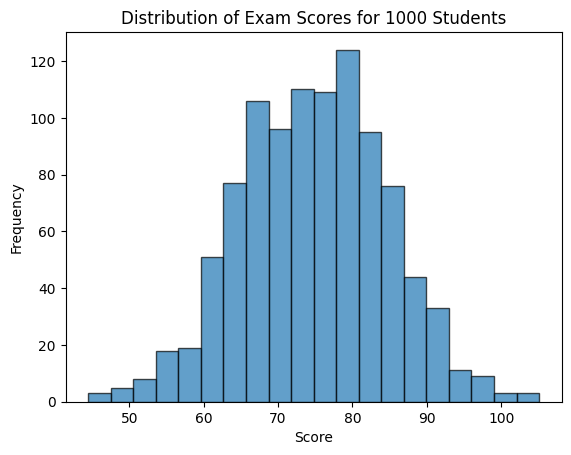

In [19]:
num_students = 1000

simulated_scores = np.random.normal(mean, std_dev, num_students)

plt.hist(simulated_scores, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores for 1000 Students')
plt.show()

In [22]:
sample_size = 50
mean_sample = mean
std_error = std_dev / np.sqrt(sample_size)

lower_bound = 70
upper_bound = 80

probability_between_70_and_80 = stats.norm.cdf(upper_bound, mean_sample, std_error) - stats.norm.cdf(lower_bound, mean_sample, std_error)

print(f"Probability that the average score of a random sample of 50 students is between 70 and 80: {probability_between_70_and_80:.4f}")

Probability that the average score of a random sample of 50 students is between 70 and 80: 0.9996


#**t-distribution**

You are a Project Manager tracking how much time employees spend on completing a specific task. You randomly sample the task completion times of 12 employees, and the average time recorded is 35 minutes, with a sample standard deviation of 5 minutes. Given the small sample size (n = 12), you will use the t-distribution to estimate the 95% confidence interval for the true average time it takes for employees to complete this task.

95% Confidence Interval for the true average time: (31.82, 38.18)


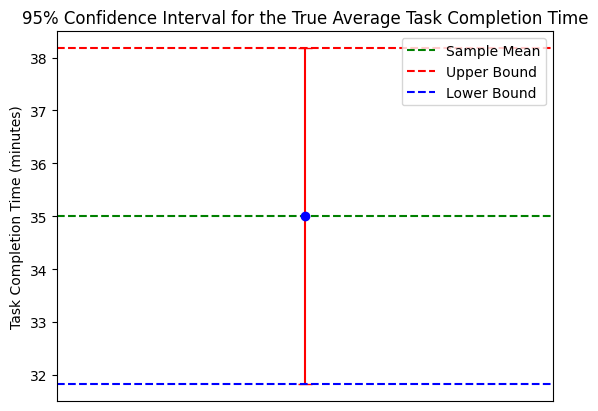

In [24]:
sample_mean = 35
sample_std_dev = 5
sample_size = 12
confidence_level = 0.95

df = sample_size - 1

t_critical = stats.t.ppf((1 + confidence_level) / 2, df)

margin_of_error = t_critical * (sample_std_dev / np.sqrt(sample_size))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for the true average time: ({lower_bound:.2f}, {upper_bound:.2f})")

plt.errorbar(x=1, y=sample_mean, yerr=margin_of_error, fmt='o', color='blue', ecolor='red', capsize=5)
plt.axhline(sample_mean, color='green', linestyle='--', label='Sample Mean')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='blue', linestyle='--', label='Lower Bound')

plt.ylabel('Task Completion Time (minutes)')
plt.xticks([])
plt.title('95% Confidence Interval for the True Average Task Completion Time')
plt.legend()
plt.show()

#**Chi-squared (χ2) distribution**

You are an Electrical Engineer monitoring the reliability of four different types of electrical circuits used in a large-scale project. Over time, circuits may fail due to overheating, material degradation, or other issues. You want to investigate whether the failures are uniformly distributed across the four types of circuits. From your records, the number of failures for each circuit type is as follows:

Circuit Type A: 25 failures
Circuit Type B: 40 failures
Circuit Type C: 35 failures
Circuit Type D: 30 failures
The total number of failures recorded is 130, and you will use a chi-squared (χ²) goodness-of-fit test to determine whether the circuit failures are distributed uniformly across all circuit types.

Chi-Squared Statistic: 3.85
P-Value: 0.2786
Fail to reject the null hypothesis: Failures are uniformly distributed across circuit types.


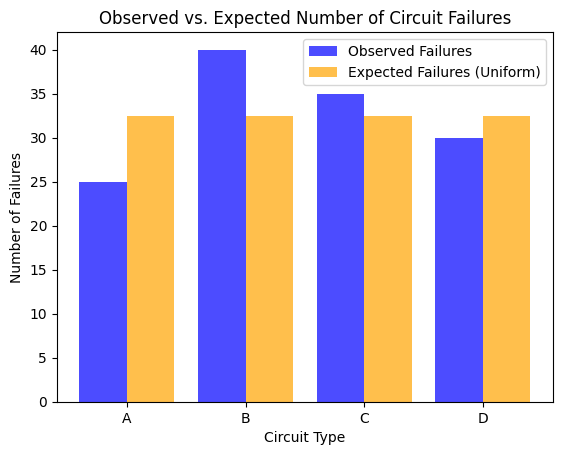

In [25]:
observed_failures = np.array([25, 40, 35, 30])
total_failures = np.sum(observed_failures)
num_types = len(observed_failures)

expected_failures = np.full(num_types, total_failures / num_types)

chi2_stat, p_value = stats.chisquare(observed_failures, expected_failures)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Failures are not uniformly distributed across circuit types.")
else:
    print("Fail to reject the null hypothesis: Failures are uniformly distributed across circuit types.")

circuit_types = ['A', 'B', 'C', 'D']
x = np.arange(len(circuit_types))

plt.bar(x - 0.2, observed_failures, width=0.4, label='Observed Failures', color='blue', alpha=0.7)
plt.bar(x + 0.2, expected_failures, width=0.4, label='Expected Failures (Uniform)', color='orange', alpha=0.7)
plt.xticks(x, circuit_types)
plt.xlabel('Circuit Type')
plt.ylabel('Number of Failures')
plt.title('Observed vs. Expected Number of Circuit Failures')
plt.legend()
plt.show()

#**F-distribution**

You are a Mechanical Engineer in charge of analyzing the performance of two types of machines (Machine A and Machine B) in a manufacturing plant. Each machine produces metal rods, and you want to compare the variability (variance) in the lengths of the rods produced by the two machines. After collecting a sample of rod lengths from each machine, you calculate the following statistics:

Machine A: Sample size = 10, variance = 2.5 mm²
Machine B: Sample size = 12, variance = 1.5 mm²
You want to use the F-distribution to test whether there is a significant difference between the variances of the two machines. The F-test will help you determine if one machine is producing more variable results than the other.

In [26]:
var_A = 2.5
var_B = 1.5
n_A = 10
n_B = 12
alpha = 0.05

if var_A > var_B:
    F_statistic = var_A / var_B
    dfn = n_A - 1
    dfd = n_B - 1
else:
    F_statistic = var_B / var_A
    dfn = n_B - 1
    dfd = n_A - 1

p_value = 2 * min(stats.f.cdf(F_statistic, dfn, dfd), 1 - stats.f.cdf(F_statistic, dfn, dfd))

print(f"F-Statistic: {F_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The variances of the two machines are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances of the two machines are not significantly different.")

F-Statistic: 1.67
P-Value: 0.4193
Fail to reject the null hypothesis: The variances of the two machines are not significantly different.
